## Healthcare project - Persistency of a drug

### Import libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
import datetime
import calendar
from datetime import date, timedelta
warnings.filterwarnings("ignore")
import calendar

### Load the dataset

In [96]:
health_df = pd.read_excel('Healthcare_dataset.xlsx',sheet_name='Dataset')
health_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [97]:
health_df.shape

(3424, 69)

In [98]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

##### There are only 2 numeric columns and remaining are categorical

### Check for null values

In [99]:
health_df.isnull().sum().sum()

0

In [100]:
health_df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

### Check for duplicate values

In [101]:
health_df.duplicated().sum()

0

##### There are no null values in the dataset and no need of handling missing values.
##### There are no duplicated data in this dataset.

### Exploratory data analysis

### Persistency rate

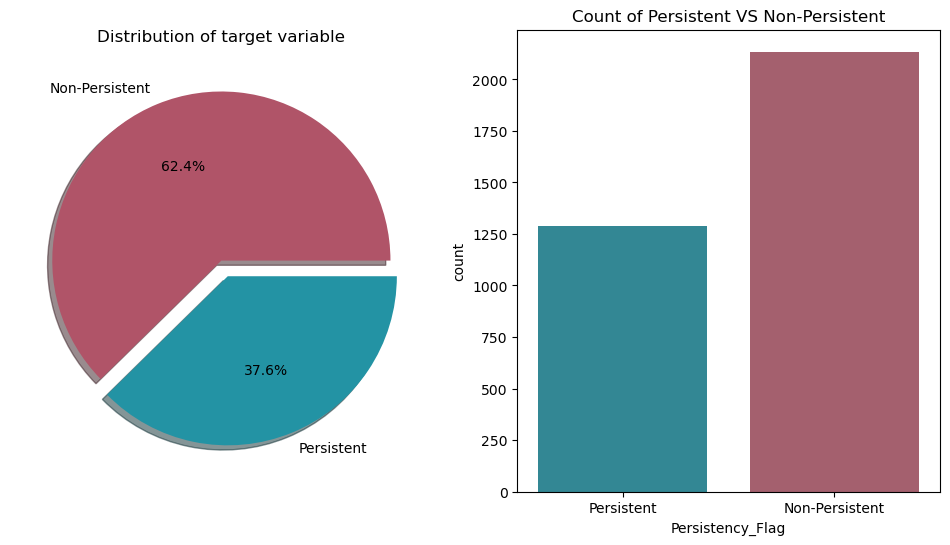

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

colors = ['#b05468','#2393a4']

#plot the pie chart to understand the percentage of Persistent and Non-Persistent
fig,ax=plt.subplots(1,2,figsize=(12,6))
health_df.Persistency_Flag.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],colors = ['#b05468','#2393a4'],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')

#count plot to understand the frequency of Persistent and Non-Persistent
sns.countplot(x='Persistency_Flag',data=health_df,ax=ax[1],palette = ['#2393a4','#b05468'])
ax[1].set_title('Count of Persistent VS Non-Persistent')
plt.show()

##### There are 37.6% of patients are persistent in taking prescription drugs while 62.4% are non persistent.

### Persistent percentage by Gender

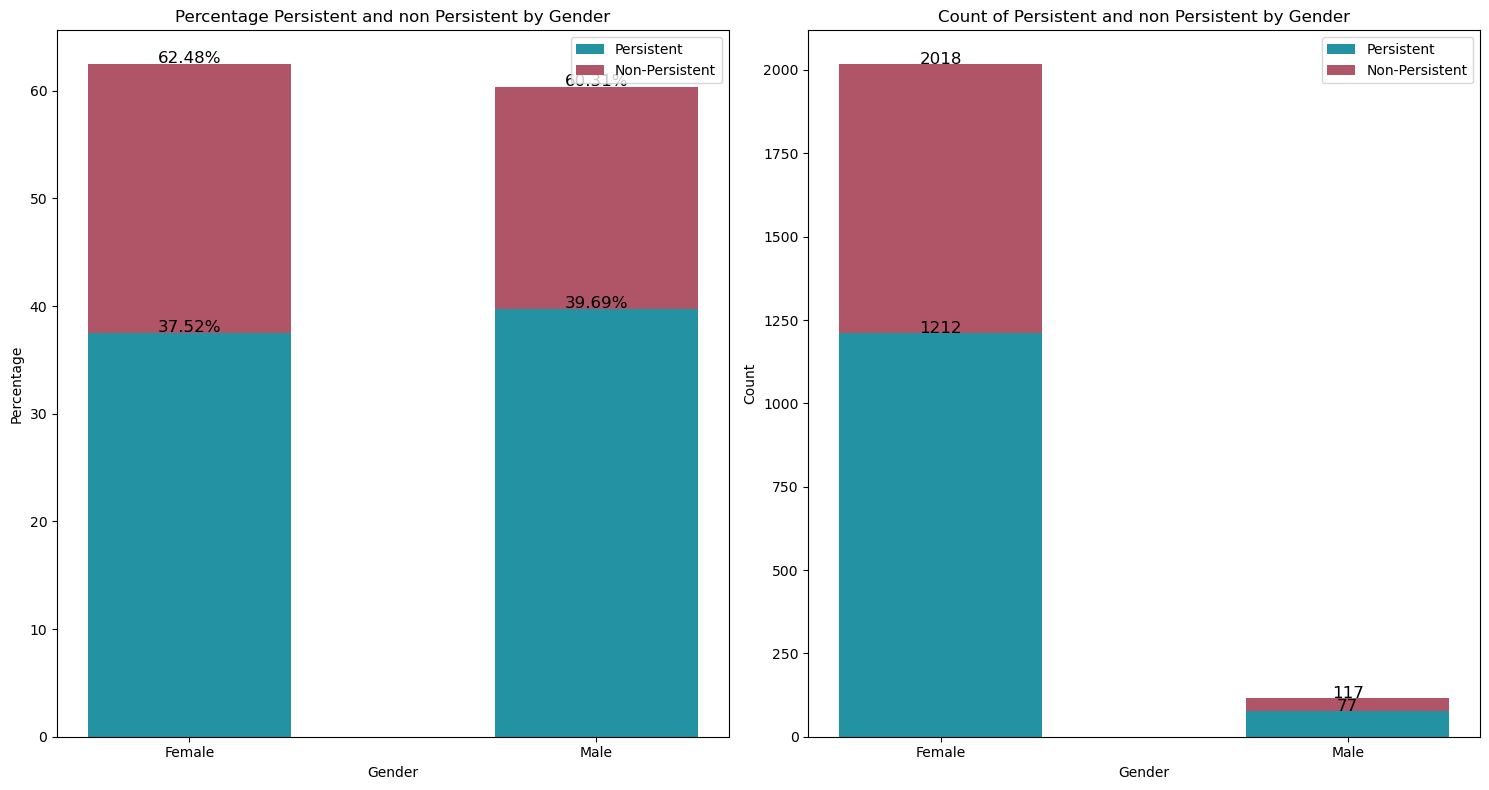

In [103]:
#Stacked bar plots for understanding the impact of Gender feature on Loan default status
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))

#subplot 1 representing Percentage Persistent and non Persistent by Gender
x,y='Gender','Persistency_Flag'
df_q=health_df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['#2393a4','#b05468'],label = 'Persistent')
g=ax1.bar(x=x,height='percent',data=df_q,width=0.5,color=['#b05468','#2393a4'],label = 'Non-Persistent')
for p in g:
    height=p.get_height().round(decimals=2)
    ax1.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Gender')
ax1.legend(loc = 'upper right')
ax1.set_title('Percentage Persistent and non Persistent by Gender')
x,y='Gender','Persistency_Flag'
df_r=health_df.groupby(x)[y].value_counts().rename('count').reset_index()
colors = {'Non Persistent':'red', 'Persistent':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

#subplot 2 representing count of Persistent and non persistent by Gender
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['#2393a4','#b05468'], label = 'Persistent')
g=ax2.bar(x=x,height='count',width=0.5,data=df_r,color=['#b05468','#2393a4'], label = 'Non-Persistent')
for p in g:
    height=p.get_height().round(decimals=2)
    ax2.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}".format(height),
           ha='center',fontsize=12)
ax2.set_ylabel('Count')
ax2.set_xlabel('Gender')
ax2.legend(loc = 'upper right')
ax2.set_title('Count of Persistent and non Persistent by Gender')
ax2.legend()
plt.tight_layout()
plt.show()

##### Women patients filled more prescription drugs as compared to men. Men are slightly more persistent than women. Male patients are persistent 39.69% as compared to female patients who are 37.52% persistent.

### Persistent percentage by Race

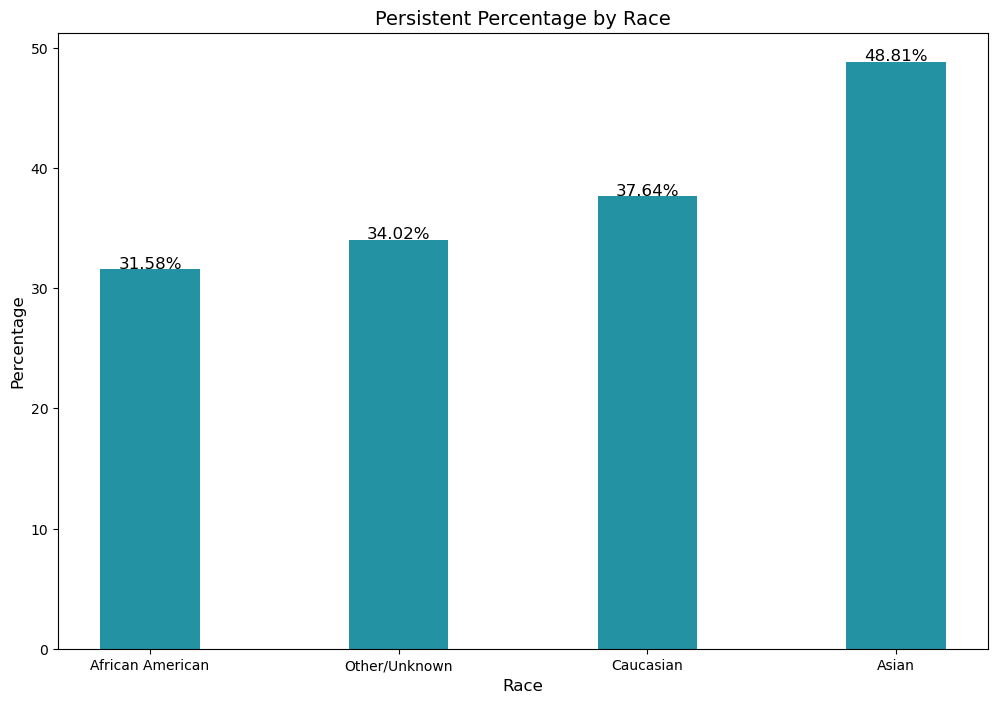

In [104]:
#bar plot depicting the Persistent percentage across different race
plt.figure(figsize=(12,8))
x,y='Race','Persistency_Flag'
df_q=health_df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_q1=df_q.loc[df_q['Persistency_Flag']=='Persistent']
df_sorted2 = df_q1.sort_values('percent')
df_sorted1=df_sorted2['percent'].round(decimals = 2)
g=plt.bar(x=x,height='percent',color='#2393a4',width=0.4,data=df_sorted2)
for p in g:
    height=p.get_height().round(decimals=2)
    plt.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
plt.xlabel("Race",fontsize='12')
plt.ylabel("Percentage",fontsize='12')
plt.title('Persistent Percentage by Race',fontsize='14')
plt.show()


##### The highest percentage(48.81%) of patients who are persistent in taking prescription drugs is among Asians, while the lowest percentage of persistent patients is among African Americans(31.58%).

### Persistent percentage by Region

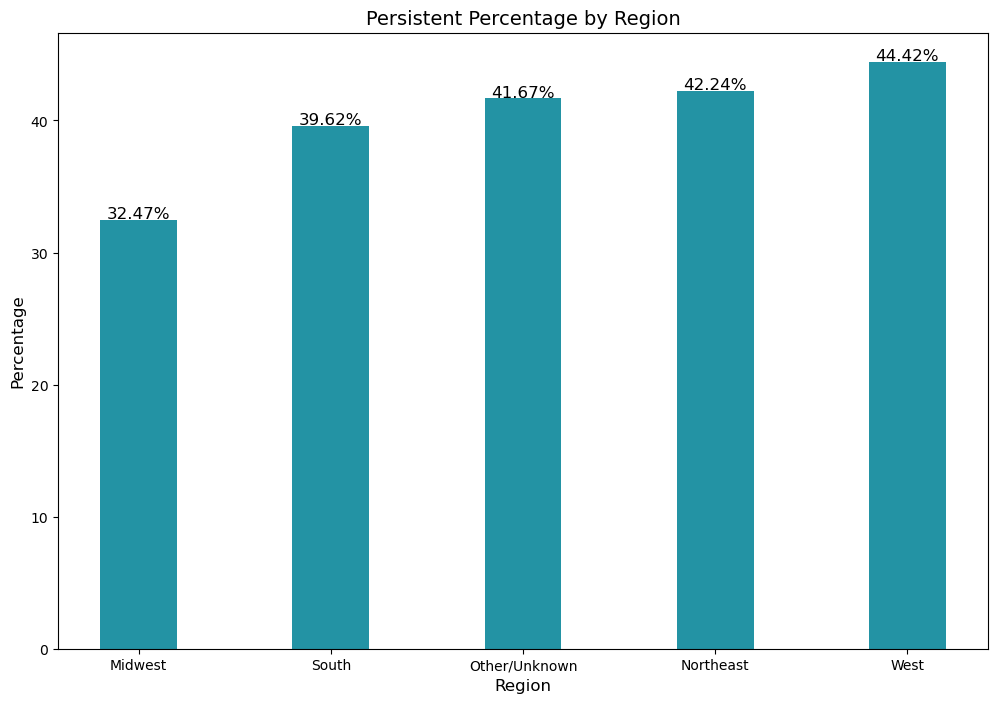

In [105]:
#bar plot depicting the Persistent percentage across different region.
plt.figure(figsize=(12,8))
x,y='Region','Persistency_Flag'
df_q=health_df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_q1=df_q.loc[df_q['Persistency_Flag']=='Persistent']
df_sorted2 = df_q1.sort_values('percent')
df_sorted1=df_sorted2['percent'].round(decimals = 2)
g=plt.bar(x=x,height='percent',color='#2393a4',width=0.4,data=df_sorted2)
for p in g:
    height=p.get_height().round(decimals=2)
    plt.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
plt.xlabel("Region",fontsize='12')
plt.ylabel("Percentage",fontsize='12')
plt.title('Persistent Percentage by Region',fontsize='14')
plt.show()


##### The highest percentage of persistent patients i.e., 44.42% are from West region and lowest persistent patients i.e., 32.47% are from Midwest. The persistent customers are 12% higher from West when compared to Midwest.

### Persistent percentage by Age_Bucket 

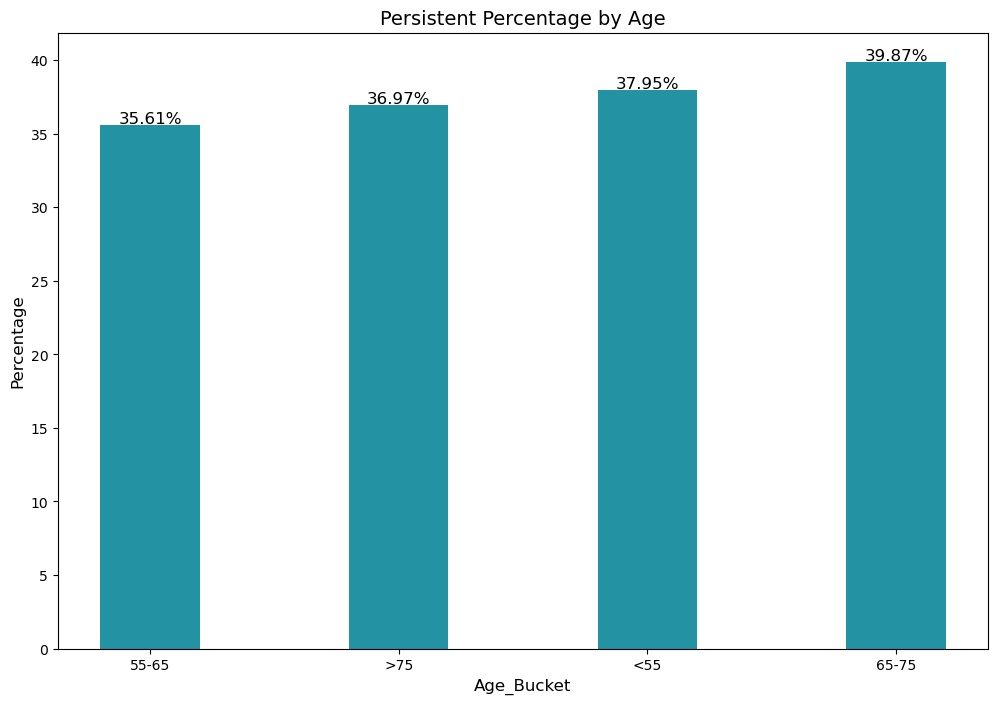

In [106]:
#bar plot depicting the Persistent percentage by Age_Bucket.
plt.figure(figsize=(12,8))
x,y='Age_Bucket','Persistency_Flag'
df_q=health_df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_q1=df_q.loc[df_q['Persistency_Flag']=='Persistent']
df_sorted2 = df_q1.sort_values('percent')
df_sorted1=df_sorted2['percent'].round(decimals = 2)
g=plt.bar(x=x,height='percent',color='#2393a4',width=0.4,data=df_sorted2)
for p in g:
    height=p.get_height().round(decimals=2)
    plt.text(x=p.get_x()+p.get_width()/2,y=height+.10,
           s="{}%".format(height),
           ha='center',fontsize=12)
plt.xlabel("Age_Bucket",fontsize='12')
plt.ylabel("Percentage",fontsize='12')
plt.title('Persistent Percentage by Age',fontsize='14')
plt.show()


##### There is no much difference between Persistent patients across different age buckets. Highest persistent are of age group 65-75 and lowest in the age group of 55-65.

### Dexa scans during Rx by persistency and Specialist

Text(0.5, 1.0, 'Dexa scans during Rx by Persistency and Specialist')

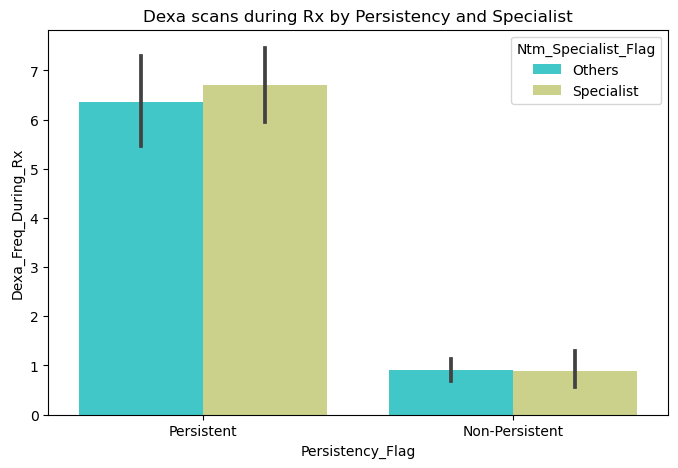

In [107]:
plt.figure(figsize=(8,5))
sns.barplot(x='Persistency_Flag',y='Dexa_Freq_During_Rx',data=health_df, palette='rainbow', hue='Ntm_Specialist_Flag')
plt.title("Dexa scans during Rx by Persistency and Specialist")


##### Dexa scans during Rx are high for persistent patients who got prescribed by NTM Specialist. There are no difference for NTM Specialist and others in Dexa scans for non persistent patients.

### Count of risks by persistency and Adherent_Flag

Text(0.5, 1.0, 'Average no of risks by Persistency and adherence to therapies')

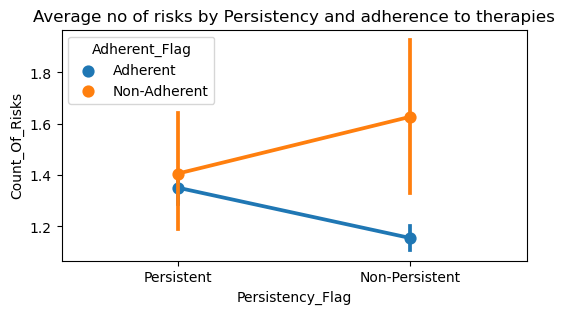

In [108]:
plt.figure(figsize=(6,3))
sns.pointplot(x='Persistency_Flag',y='Count_Of_Risks',data=health_df, hue='Adherent_Flag')
plt.title("Average no of risks by Persistency and adherence to therapies")

##### The count of risks for Persistent patients are high for Non-Adherent and low for Adherent patients.Similarly, for Non persistent patients, the count of risks are high when patients are non adherent.

### Understanding correlation between variables

<Axes: >

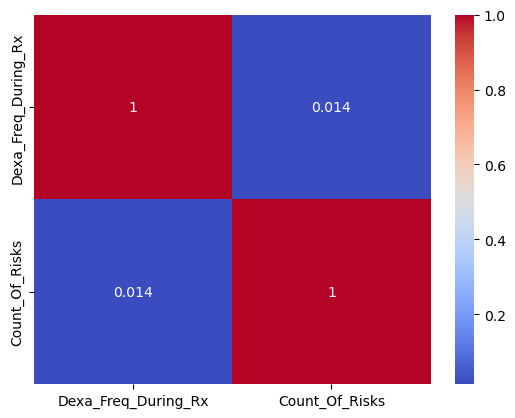

In [109]:
sns.heatmap(health_df.corr(), cmap="coolwarm", annot=True)

#### There are only 2 numeric values Number of DEXA scans taken during Rx and count of risks

### Outlier Analysis

#### Now lets do Outlier analysis for 2 numeric columns Dexa_Freq_During_Rx and Count_Of_Risks

Text(0, 0.5, 'Dexa_Freq_During_Rx')

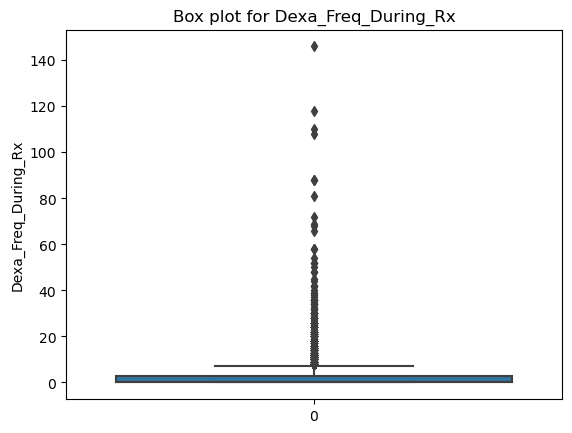

In [110]:
ax=sns.boxplot(health_df['Dexa_Freq_During_Rx'])
ax.set_title('Box plot for Dexa_Freq_During_Rx')
ax.set_ylabel('Dexa_Freq_During_Rx')

#### There are many outliers for Dexa_Freq_During_Rx. So, we can now check to see skewness using Histogram

<Axes: xlabel='Dexa_Freq_During_Rx', ylabel='Count'>

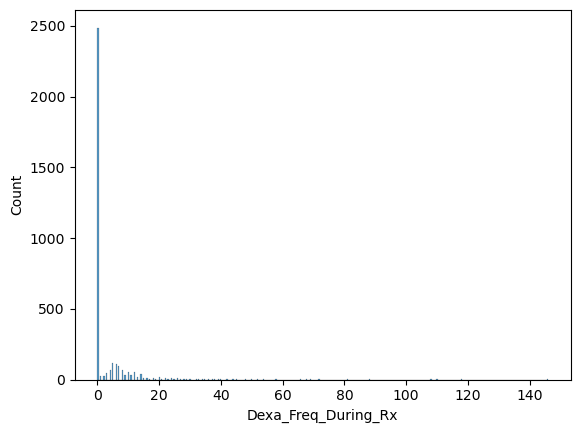

In [111]:
sns.histplot(health_df, x='Dexa_Freq_During_Rx')

#### We can clearly see that it is not normal distribution and it is right skewed data.

In [112]:
health_df.shape

(3424, 69)

### Identifying outliers using IQR and removing them.

In [113]:
Q1 = health_df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = health_df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(health_df['Dexa_Freq_During_Rx']>=upper)[0]
lower_array = np.where(health_df['Dexa_Freq_During_Rx']<=lower)[0]
 
# Removing the outliers
health_df.drop(index=upper_array, inplace=True)
health_df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", health_df.shape)

New Shape:  (2964, 69)


#### There are 460 outliers for Dexa_Freq_During_Rx and they are removed based on IQR.

Text(0, 0.5, 'Count_Of_Risks')

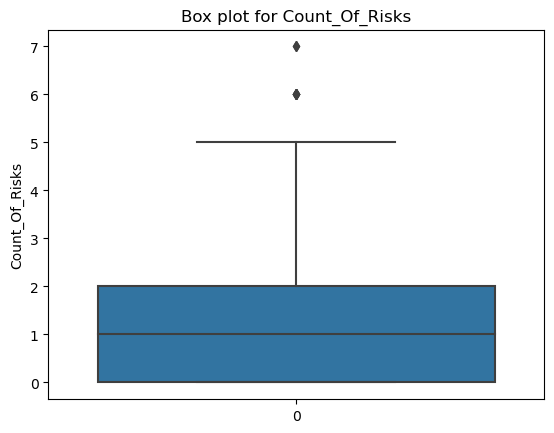

In [114]:
ax=sns.boxplot(health_df['Count_Of_Risks'])
ax.set_title('Box plot for Count_Of_Risks')
ax.set_ylabel('Count_Of_Risks')

#### We can clearly see there are only 2 outliers for Count of risks and the records with the values 6 and 7 are outliers.

<Axes: xlabel='Count_Of_Risks', ylabel='Count'>

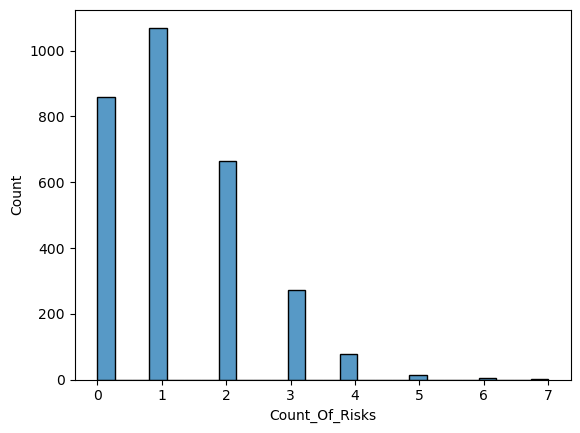

In [115]:
sns.histplot(health_df, x='Count_Of_Risks')

### Remove these outliers with values 6 and 7

In [116]:
health_df.Count_Of_Risks.unique()

array([0, 2, 1, 3, 4, 5, 6, 7], dtype=int64)

In [117]:
health_df = health_df[(health_df['Count_Of_Risks'] != 6) & (health_df['Count_Of_Risks'] != 7)]
health_df.shape

(2956, 69)

#### There are 8 outliers for count of risks with values 6,7 and which are removed.

### Skewness after removing outliers

<Axes: xlabel='Dexa_Freq_During_Rx', ylabel='Count'>

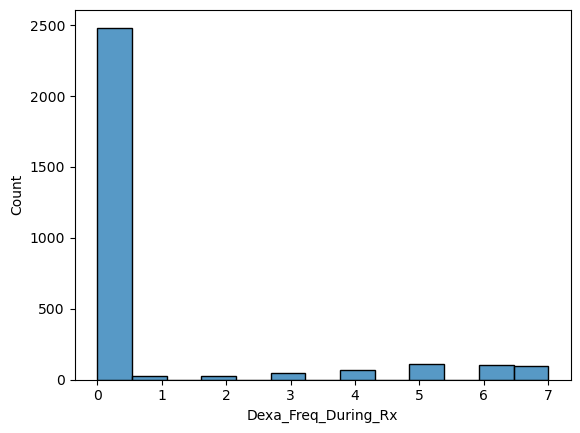

In [118]:
sns.histplot(health_df, x='Dexa_Freq_During_Rx')

In [119]:
health_df['Dexa_Freq_During_Rx'].value_counts()

0    2483
5     113
6     106
7      93
4      68
3      46
2      24
1      23
Name: Dexa_Freq_During_Rx, dtype: int64

#### They are higher number of records with 0 values, so Dexa_Freq_During_Rx is highly skewed and removing 2483 is not valid. So skewness for Dexa_Freq_During_Rx cannot be reduced. Applying different transformations will also not work for this column.

#### The skewness is high for Dexa_Freq_During_Rx

<Axes: xlabel='Count_Of_Risks', ylabel='Count'>

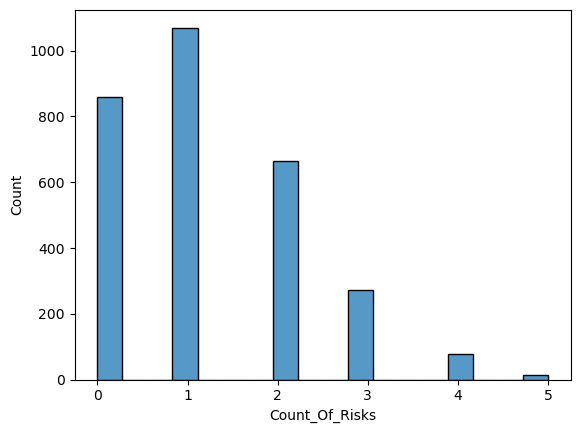

In [120]:
sns.histplot(health_df, x='Count_Of_Risks')

In [121]:
health_df['Count_Of_Risks'].value_counts()

1    1070
0     858
2     664
3     271
4      79
5      14
Name: Count_Of_Risks, dtype: int64

#### Count of risks skewness is reduced. But removing more data values will have data loss and may result in bias in results. So, we are leaving the remaining values.

In [122]:
#Identify highly correlated features
import warnings
warnings.filterwarnings("ignore")
#Create correlation matrix
cor_matrix = health_df.corr().abs()
#Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#Find index of feature columns with correlation greater than 0.7
corr_features= [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print('The highly correlated features are:',corr_features)

The highly correlated features are: []


##### There are no highly correlated features so not dropping any columns.

In [123]:
df_cols = health_df.columns[(health_df.dtypes == 'object') & (health_df.columns!= 'Persistency_Flag')]
df_cols

Index(['Ptid', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket',
       'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditi

### Data Transformation

##### Ptid is patient id and categorical.but is not important to understand factors effecting persistency of a drug. 
##### This field cannot be used for model building as it is not numeric. Dropping this feature.

In [124]:
health_df.drop(['Ptid'],axis=1,inplace=True)

In [125]:
health_df.shape

(2956, 68)

In [126]:
health_df['Gender'].value_counts()

Female    2782
Male       174
Name: Gender, dtype: int64

In [127]:
health_df['Race'].value_counts()

Caucasian           2715
African American      92
Other/Unknown         80
Asian                 69
Name: Race, dtype: int64

In [128]:
health_df['Ethnicity'].value_counts()

Not Hispanic    2797
Hispanic          82
Unknown           77
Name: Ethnicity, dtype: int64

In [129]:
health_df['Region'].value_counts()

Midwest          1212
South            1116
West              384
Northeast         195
Other/Unknown      49
Name: Region, dtype: int64

In [130]:
health_df['Age_Bucket'].value_counts()

>75      1264
65-75     921
55-65     624
<55       147
Name: Age_Bucket, dtype: int64

In [131]:
health_df['Idn_Indicator'].value_counts()

Y    2212
N     744
Name: Idn_Indicator, dtype: int64

In [132]:
health_df['Ntm_Speciality'].value_counts()

GENERAL PRACTITIONER                                              1350
RHEUMATOLOGY                                                       510
ENDOCRINOLOGY                                                      367
Unknown                                                            284
ONCOLOGY                                                           187
OBSTETRICS AND GYNECOLOGY                                           80
UROLOGY                                                             30
ORTHOPEDIC SURGERY                                                  26
CARDIOLOGY                                                          21
OTOLARYNGOLOGY                                                      13
PATHOLOGY                                                           13
HEMATOLOGY & ONCOLOGY                                               12
PHYSICAL MEDICINE AND REHABILITATION                                11
PEDIATRICS                                                           9
SURGER

In [133]:
health_df['Ntm_Specialist_Flag'].value_counts()

Others        1781
Specialist    1175
Name: Ntm_Specialist_Flag, dtype: int64

In [134]:
health_df['Ntm_Speciality_Bucket'].value_counts()

OB/GYN/Others/PCP/Unknown    1862
Endo/Onc/Uro                  584
Rheum                         510
Name: Ntm_Speciality_Bucket, dtype: int64

In [135]:
health_df['Tscore_Bucket_Prior_Ntm'].value_counts()

>-2.5     1695
<=-2.5    1261
Name: Tscore_Bucket_Prior_Ntm, dtype: int64

In [136]:
health_df['Change_T_Score'].value_counts()

No change    1397
Unknown      1365
Worsened      134
Improved       60
Name: Change_T_Score, dtype: int64

In [137]:
health_df['Risk_Segment_Prior_Ntm'].value_counts()

VLR_LR    1682
HR_VHR    1274
Name: Risk_Segment_Prior_Ntm, dtype: int64

In [138]:
health_df['Change_Risk_Segment'].value_counts()

Unknown      1977
No change     869
Worsened       95
Improved       15
Name: Change_Risk_Segment, dtype: int64

In [139]:
health_df['Risk_Segment_During_Rx'].value_counts()

Unknown    1365
VLR_LR      802
HR_VHR      789
Name: Risk_Segment_During_Rx, dtype: int64

In [140]:
health_df['Dexa_During_Rx'].value_counts()

N    2483
Y     473
Name: Dexa_During_Rx, dtype: int64

In [141]:
health_df['Frag_Frac_Prior_Ntm'].value_counts()

N    2505
Y     451
Name: Frag_Frac_Prior_Ntm, dtype: int64

In [142]:
health_df['Frag_Frac_During_Rx'].value_counts()

N    2623
Y     333
Name: Frag_Frac_During_Rx, dtype: int64

In [143]:
health_df['Gluco_Record_Prior_Ntm'].value_counts()

N    2251
Y     705
Name: Gluco_Record_Prior_Ntm, dtype: int64

In [144]:
health_df['Gluco_Record_During_Rx'].value_counts()

N    2216
Y     740
Name: Gluco_Record_During_Rx, dtype: int64

In [145]:
health_df['Injectable_Experience_During_Rx'].value_counts()

Y    2629
N     327
Name: Injectable_Experience_During_Rx, dtype: int64

In [146]:
health_df['Adherent_Flag'].value_counts()

Adherent        2821
Non-Adherent     135
Name: Adherent_Flag, dtype: int64

In [147]:
health_df['Comorb_Vitamin_D_Deficiency'].value_counts()

N    2059
Y     897
Name: Comorb_Vitamin_D_Deficiency, dtype: int64

In [148]:
health_df['Concom_Narcotics'].value_counts()

N    1941
Y    1015
Name: Concom_Narcotics, dtype: int64

In [149]:
health_df['Risk_Type_1_Insulin_Dependent_Diabetes'].value_counts()

N    2832
Y     124
Name: Risk_Type_1_Insulin_Dependent_Diabetes, dtype: int64

##### We can see that most of them 'Y' or 'N' features or have binary values. 
##### 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Speciality_Bucket', 
##### 'Change_T_Score', 'Change_Risk_Segment', 'Risk_Segment_During_Rx' have multiple values.

### Mapping Categorical Features

In [150]:
map_cat={'N':0, 'Y':1}
health_df=health_df.replace(map_cat)

In [151]:
df_cols = health_df.columns[(health_df.dtypes == 'object') & (health_df.columns!= 'Persistency_Flag')]
df_cols

Index(['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm',
       'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Change_Risk_Segment', 'Adherent_Flag'],
      dtype='object')

In [152]:
health_df['Gender'].value_counts()

Female    2782
Male       174
Name: Gender, dtype: int64

##### Females are high, so lets map Female as 0 and Male as 1

In [153]:
map_g = {'Female':0, 
            'Male':1,
          }
health_df['Gender'] = health_df['Gender'].replace(map_g)
health_df['Gender']=health_df['Gender'].astype(int)

In [154]:
health_df['Ntm_Specialist_Flag'].value_counts()

Others        1781
Specialist    1175
Name: Ntm_Specialist_Flag, dtype: int64

In [155]:
map_s = {'Others':0, 
            'Specialist':1,
          }
health_df['Ntm_Specialist_Flag'] = health_df['Ntm_Specialist_Flag'].replace(map_s)
health_df['Ntm_Specialist_Flag']=health_df['Ntm_Specialist_Flag'].astype(int)

In [156]:
health_df['Adherent_Flag'].value_counts()

Adherent        2821
Non-Adherent     135
Name: Adherent_Flag, dtype: int64

In [157]:
map_a = {'Non-Adherent':0, 
            'Adherent':1,
          }
health_df['Adherent_Flag'] = health_df['Adherent_Flag'].replace(map_a)
health_df['Adherent_Flag']=health_df['Adherent_Flag'].astype(int)

### One Hot encoding

In [158]:
df_cols = health_df.columns[(health_df.dtypes == 'object') & (health_df.columns!= 'Persistency_Flag')]
df_cols

Index(['Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'],
      dtype='object')

In [159]:
#One hot encoding on multiple categorical columns using get_dummies()
cols=pd.get_dummies(health_df,columns=['Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'],
                    prefix=['Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'])
health_df[cols.columns]=cols
health_df.drop(['Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Speciality_Bucket', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'],axis=1,inplace=True)

In [160]:
df_cols = health_df.columns[(health_df.dtypes == 'object') & (health_df.columns!= 'Persistency_Flag')]
df_cols

Index([], dtype='object')

#### Convert Persistency_Flag to numeric

In [161]:
health_df['Persistency_Flag'].value_counts()

Non-Persistent    2053
Persistent         903
Name: Persistency_Flag, dtype: int64

In [162]:
map_p = {'Non-Persistent':0, 
            'Persistent':1,
          }
health_df['Persistency_Flag'] = health_df['Persistency_Flag'].replace(map_p)
health_df['Persistency_Flag']=health_df['Persistency_Flag'].astype(int)

In [163]:
df_cols = health_df.columns[(health_df.dtypes == 'object')]
df_cols

Index([], dtype='object')

### Target Analysis after transformation

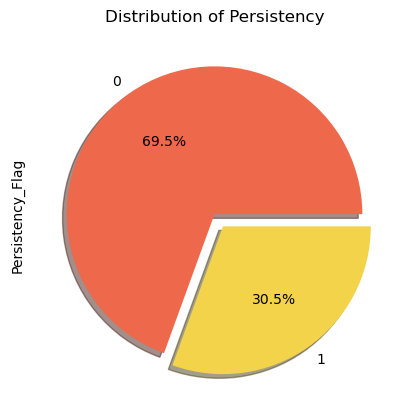

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

colors = ['#ee684b','#f3d34a']

#plot the pie chart to understand the percentage of Persistent and Non-Persistent
health_df.Persistency_Flag.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, 
                                                   colors=colors).set(title='Distribution of Persistency')
plt.show()

##### Now all features are converted to numeric values for model building

### Standardization and Train/Test Split

In [165]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X=health_df.drop('Persistency_Flag',axis=1)
Y=health_df['Persistency_Flag']
#split into train and test datasets.
X_train_org,X_test_org,Y_train,Y_test=train_test_split(X,Y,train_size=0.70, random_state=0)
#normalize dataset using MinMaxScaler()
scaler=MinMaxScaler()
#apply the scale to fit and transform test and train sets
X_train=pd.DataFrame(scaler.fit_transform(X_train_org),columns=X_train_org.columns)
X_test=pd.DataFrame(scaler.transform(X_test_org),columns=X_test_org.columns)

In [166]:
data=health_df.copy()

### Model Building

#### Model1:Logistic Regression

In [197]:
#Build Logistic Regression model on dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
#instantiate the logistic regression model
log_reg = LogisticRegression(C =0.01, max_iter = 100, penalty = 'l2', solver = 'newton-cg',random_state=0)
# fit the logistic regression model with data 
log_reg.fit(X_train, Y_train)
Y_predict=log_reg.predict(X_test)
accuracy_score_log_reg = accuracy_score(Y_test, Y_predict)
print("Logistic Regression Accuracy Score: {:.3f}".format(accuracy_score_log_reg))
#predict the features of dataset
pred_prob_log_reg_train= log_reg.predict_proba(X_train)
pred_prob_log_reg_test= log_reg.predict_proba(X_test)
#calculate the scores
roc_auc_score_log_reg_train = roc_auc_score(Y_train, pred_prob_log_reg_train[:,1])
roc_auc_score_log_reg_test = roc_auc_score(Y_test, pred_prob_log_reg_test[:,1])
print("Logistic Regression Train ROC_AUC Score: {:.3f}".format(roc_auc_score_log_reg_train))
print("Logistic Regression Test ROC_AUC Score: {:.3f}".format(roc_auc_score_log_reg_test))

Logistic Regression Accuracy Score: 0.796
Logistic Regression Train ROC_AUC Score: 0.867
Logistic Regression Test ROC_AUC Score: 0.843


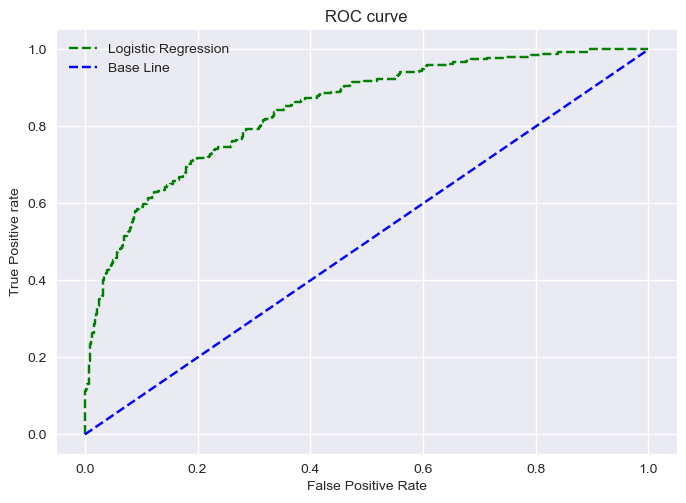

In [198]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_test, pred_prob_log_reg_test[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Base Line')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### Model2- Decision Tree Classifier

In [199]:
#Build Decision tree model on dataset
from sklearn.tree import DecisionTreeClassifier
#instantiate the logistic regression model
dtree = DecisionTreeClassifier(max_depth = 4,random_state=0)
#fit the decision tree model with data 
dtree.fit(X_train, Y_train)
Y_predict=dtree.predict(X_test)
accuracy_score_dtree = accuracy_score(Y_test, Y_predict)
print("Decision Tree Accuracy Score: {:.3f}".format(accuracy_score_dtree))
#predict the features of dataset
pred_prob_dtree_train = dtree.predict_proba(X_train)
pred_prob_dtree_test = dtree.predict_proba(X_test)
#calculate the scores
dtree_best_train_score = roc_auc_score(Y_train, pred_prob_dtree_train[:,1])
dtree_best_test_score = roc_auc_score(Y_test, pred_prob_dtree_test[:,1])
print("Decision Tree Train ROC_AUC Score: {:.3f}".format(dtree_best_train_score))
print("Decision Tree Test ROC_AUC Score: {:.3f}".format(dtree_best_test_score))

Decision Tree Accuracy Score: 0.776
Decision Tree Train ROC_AUC Score: 0.825
Decision Tree Test ROC_AUC Score: 0.794


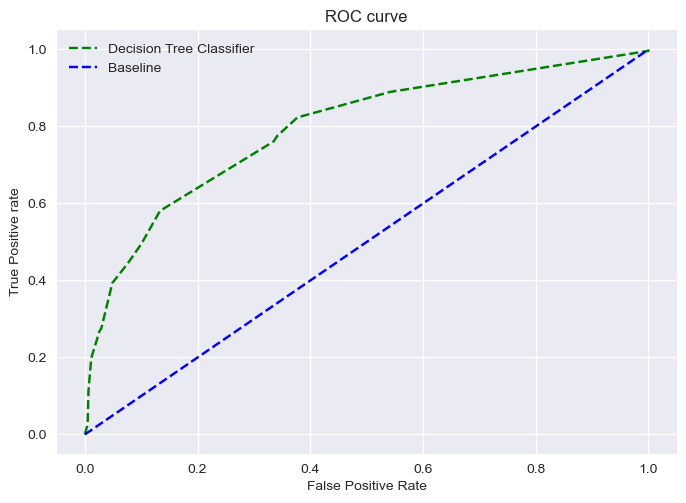

In [200]:
fpr_dtree, tpr_dtree, thresh_dtree = roc_curve(Y_test, pred_prob_dtree_test[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dtree, tpr_dtree, linestyle='--',color='green', label= "Decision Tree Classifier")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Baseline')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### Model3: Random Forest Classifier

In [201]:
#Build the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
#instantiate the Random Forest model
rnd_clf =  RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=6,max_leaf_nodes=7,
                                  max_features=0.1,max_samples=0.1,random_state=0)
#fit the Random Forest model with data 
rnd_clf.fit(X_train, Y_train)

#predict the features of dataset
Y_predict=rnd_clf.predict(X_test)
rnd_predprob_train = rnd_clf.predict_proba(X_train)
rnd_predprob_test = rnd_clf.predict_proba(X_test)

#calculate the scores
print("Random Classifier Accuracy Score: {:.3f}".format(accuracy_score(Y_test, Y_predict)))
print("Random Classifier Train Score: {:.3f}" .format(roc_auc_score(Y_train, rnd_predprob_train[:,1])))
print("Random Classifie Test Score: {:.3f}" .format(roc_auc_score(Y_test, rnd_predprob_test[:,1])))

Random Classifier Accuracy Score: 0.777
Random Classifier Train Score: 0.858
Random Classifie Test Score: 0.844


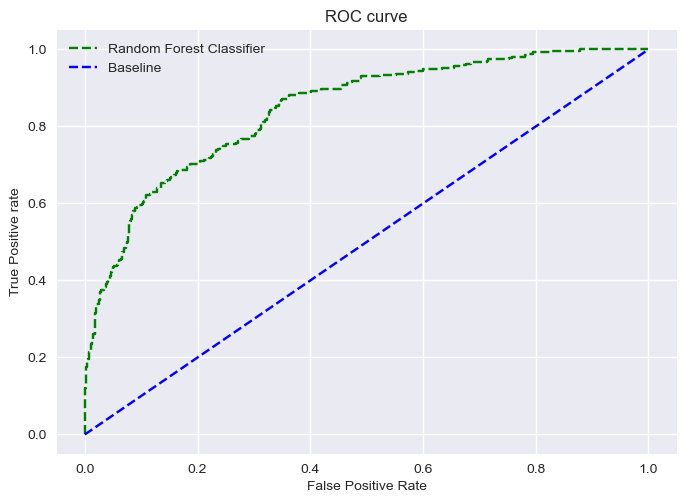

In [202]:
fpr_dtree, tpr_dtree, thresh_dtree = roc_curve(Y_test, rnd_predprob_test[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dtree, tpr_dtree, linestyle='--',color='green', label= "Random Forest Classifier")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Baseline')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [170]:
#pip install xgboost

#### Model4:XGBoost Classifier

In [203]:
#Build the XGBoost Clarifier model
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=60,max_depth = 4,gamma=5,min_child_weight=40,random_state=0)
#fit the XGBoost model with data 
xgb_clf.fit(X_train.to_numpy(), Y_train.to_numpy())
#predict the features of dataset
Y_predict=xgb_clf.predict(X_test)
pred_prob_xgb_train = xgb_clf.predict_proba(X_train)
pred_prob_xgb_test = xgb_clf.predict_proba(X_test)
accuracy_score_xgb = accuracy_score(Y_test, Y_predict)
xgb_best_train_score = roc_auc_score(Y_train, pred_prob_xgb_train[:,1])
xgb_best_test_score = roc_auc_score(Y_test, pred_prob_xgb_test[:,1])
#calculate the scores
print("XGBoost Accuracy Score: {:.3f}".format(accuracy_score_xgb))
print("XGBoost Train ROC_AUC Score: {:.3f}".format(xgb_best_train_score))
print("XGBoost Tree Test ROC_AUC Score: {:.3f}".format(xgb_best_test_score))

XGBoost Accuracy Score: 0.791
XGBoost Train ROC_AUC Score: 0.880
XGBoost Tree Test ROC_AUC Score: 0.833


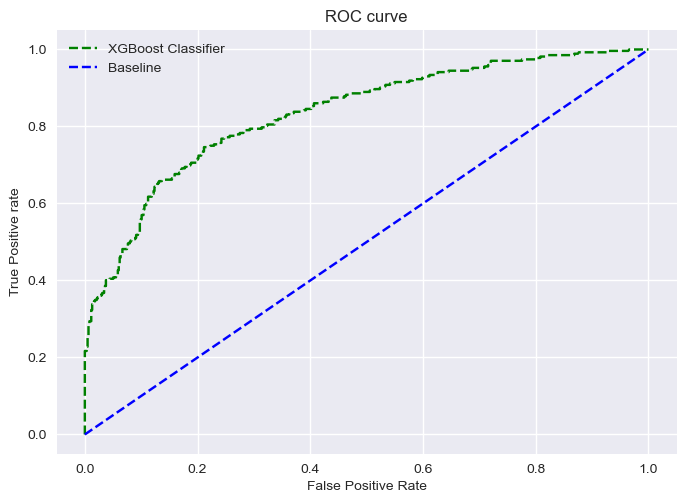

In [204]:
fpr_dtree, tpr_dtree, thresh_dtree = roc_curve(Y_test, pred_prob_xgb_test[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dtree, tpr_dtree, linestyle='--',color='green', label= "XGBoost Classifier")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Baseline')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Model Evaluation

In [172]:
#Evaluating the performance of all the above models and display the scores
models = ['Logistic Regression', 'Decision Tree Classifier', 
          'Random Forest Classifier','XGBoost Classifier']

In [173]:
model_results = pd.DataFrame(np.array([[roc_auc_score_log_reg_train, roc_auc_score_log_reg_test],
                             [dtree_best_train_score, dtree_best_test_score],
                             [roc_auc_score(Y_train, rnd_predprob_train[:,1]), roc_auc_score(Y_test, rnd_predprob_test[:,1])],
                                      [xgb_best_train_score,xgb_best_test_score]]),
                   columns=['Train_Score','Test_Score'], index=[i for i in models])

In [174]:
model_results['Train_Score'] = round(model_results['Train_Score'],4)
model_results['Test_Score'] = round(model_results['Test_Score'],4)

In [175]:
model_results['Difference'] = round(model_results['Train_Score']-model_results['Test_Score'],4)

In [176]:
model_results

,Train_Score,Test_Score,Difference
Logistic Regression,0.8673,0.8425,0.0248
Decision Tree Classifier,0.8250,0.7943,0.0307
Random Forest Classifier,0.8584,0.8444,0.0140
XGBoost Classifier,0.8797,0.8335,0.0462


### Result:
From the above table, XGBoost Classifier is a good fit model with higher roc_auc score.

### Feature Selection

In [177]:
#display the feature importance scores
feature_scores = pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Dexa_Freq_During_Rx                      0.196979
Comorb_Long_Term_Current_Drug_Therapy    0.134642
Concom_Viral_Vaccines                    0.089286
Concom_Cephalosporins                    0.063223
Concom_Systemic_Corticosteroids_Plain    0.053472
                                           ...   
Risk_Estrogen_Deficiency                 0.000000
Risk_Hysterectomy_Oophorectomy           0.000000
Risk_Excessive_Thinness                  0.000000
Risk_Poor_Health_Frailty                 0.000000
Change_Risk_Segment_Worsened             0.000000
Length: 127, dtype: float32

In [178]:
f_ser = feature_scores.to_frame(name='coeff')
f_ser

,coeff
Dexa_Freq_During_Rx,0.196979
Comorb_Long_Term_Current_Drug_Therapy,0.134642
Concom_Viral_Vaccines,0.089286
Concom_Cephalosporins,0.063223
Concom_Systemic_Corticosteroids_Plain,0.053472
...,...
Risk_Estrogen_Deficiency,0.000000
Risk_Hysterectomy_Oophorectomy,0.000000
Risk_Excessive_Thinness,0.000000
Risk_Poor_Health_Frailty,0.000000


In [179]:
#dropping the features with 0 importance score
f_ser.drop(f_ser.index[f_ser['coeff'] == 0], inplace = True)

In [180]:
f_ser.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Dexa_Freq_During_Rx to Ntm_Specialist_Flag
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   coeff   26 non-null     float32
dtypes: float32(1)
memory usage: 312.0+ bytes


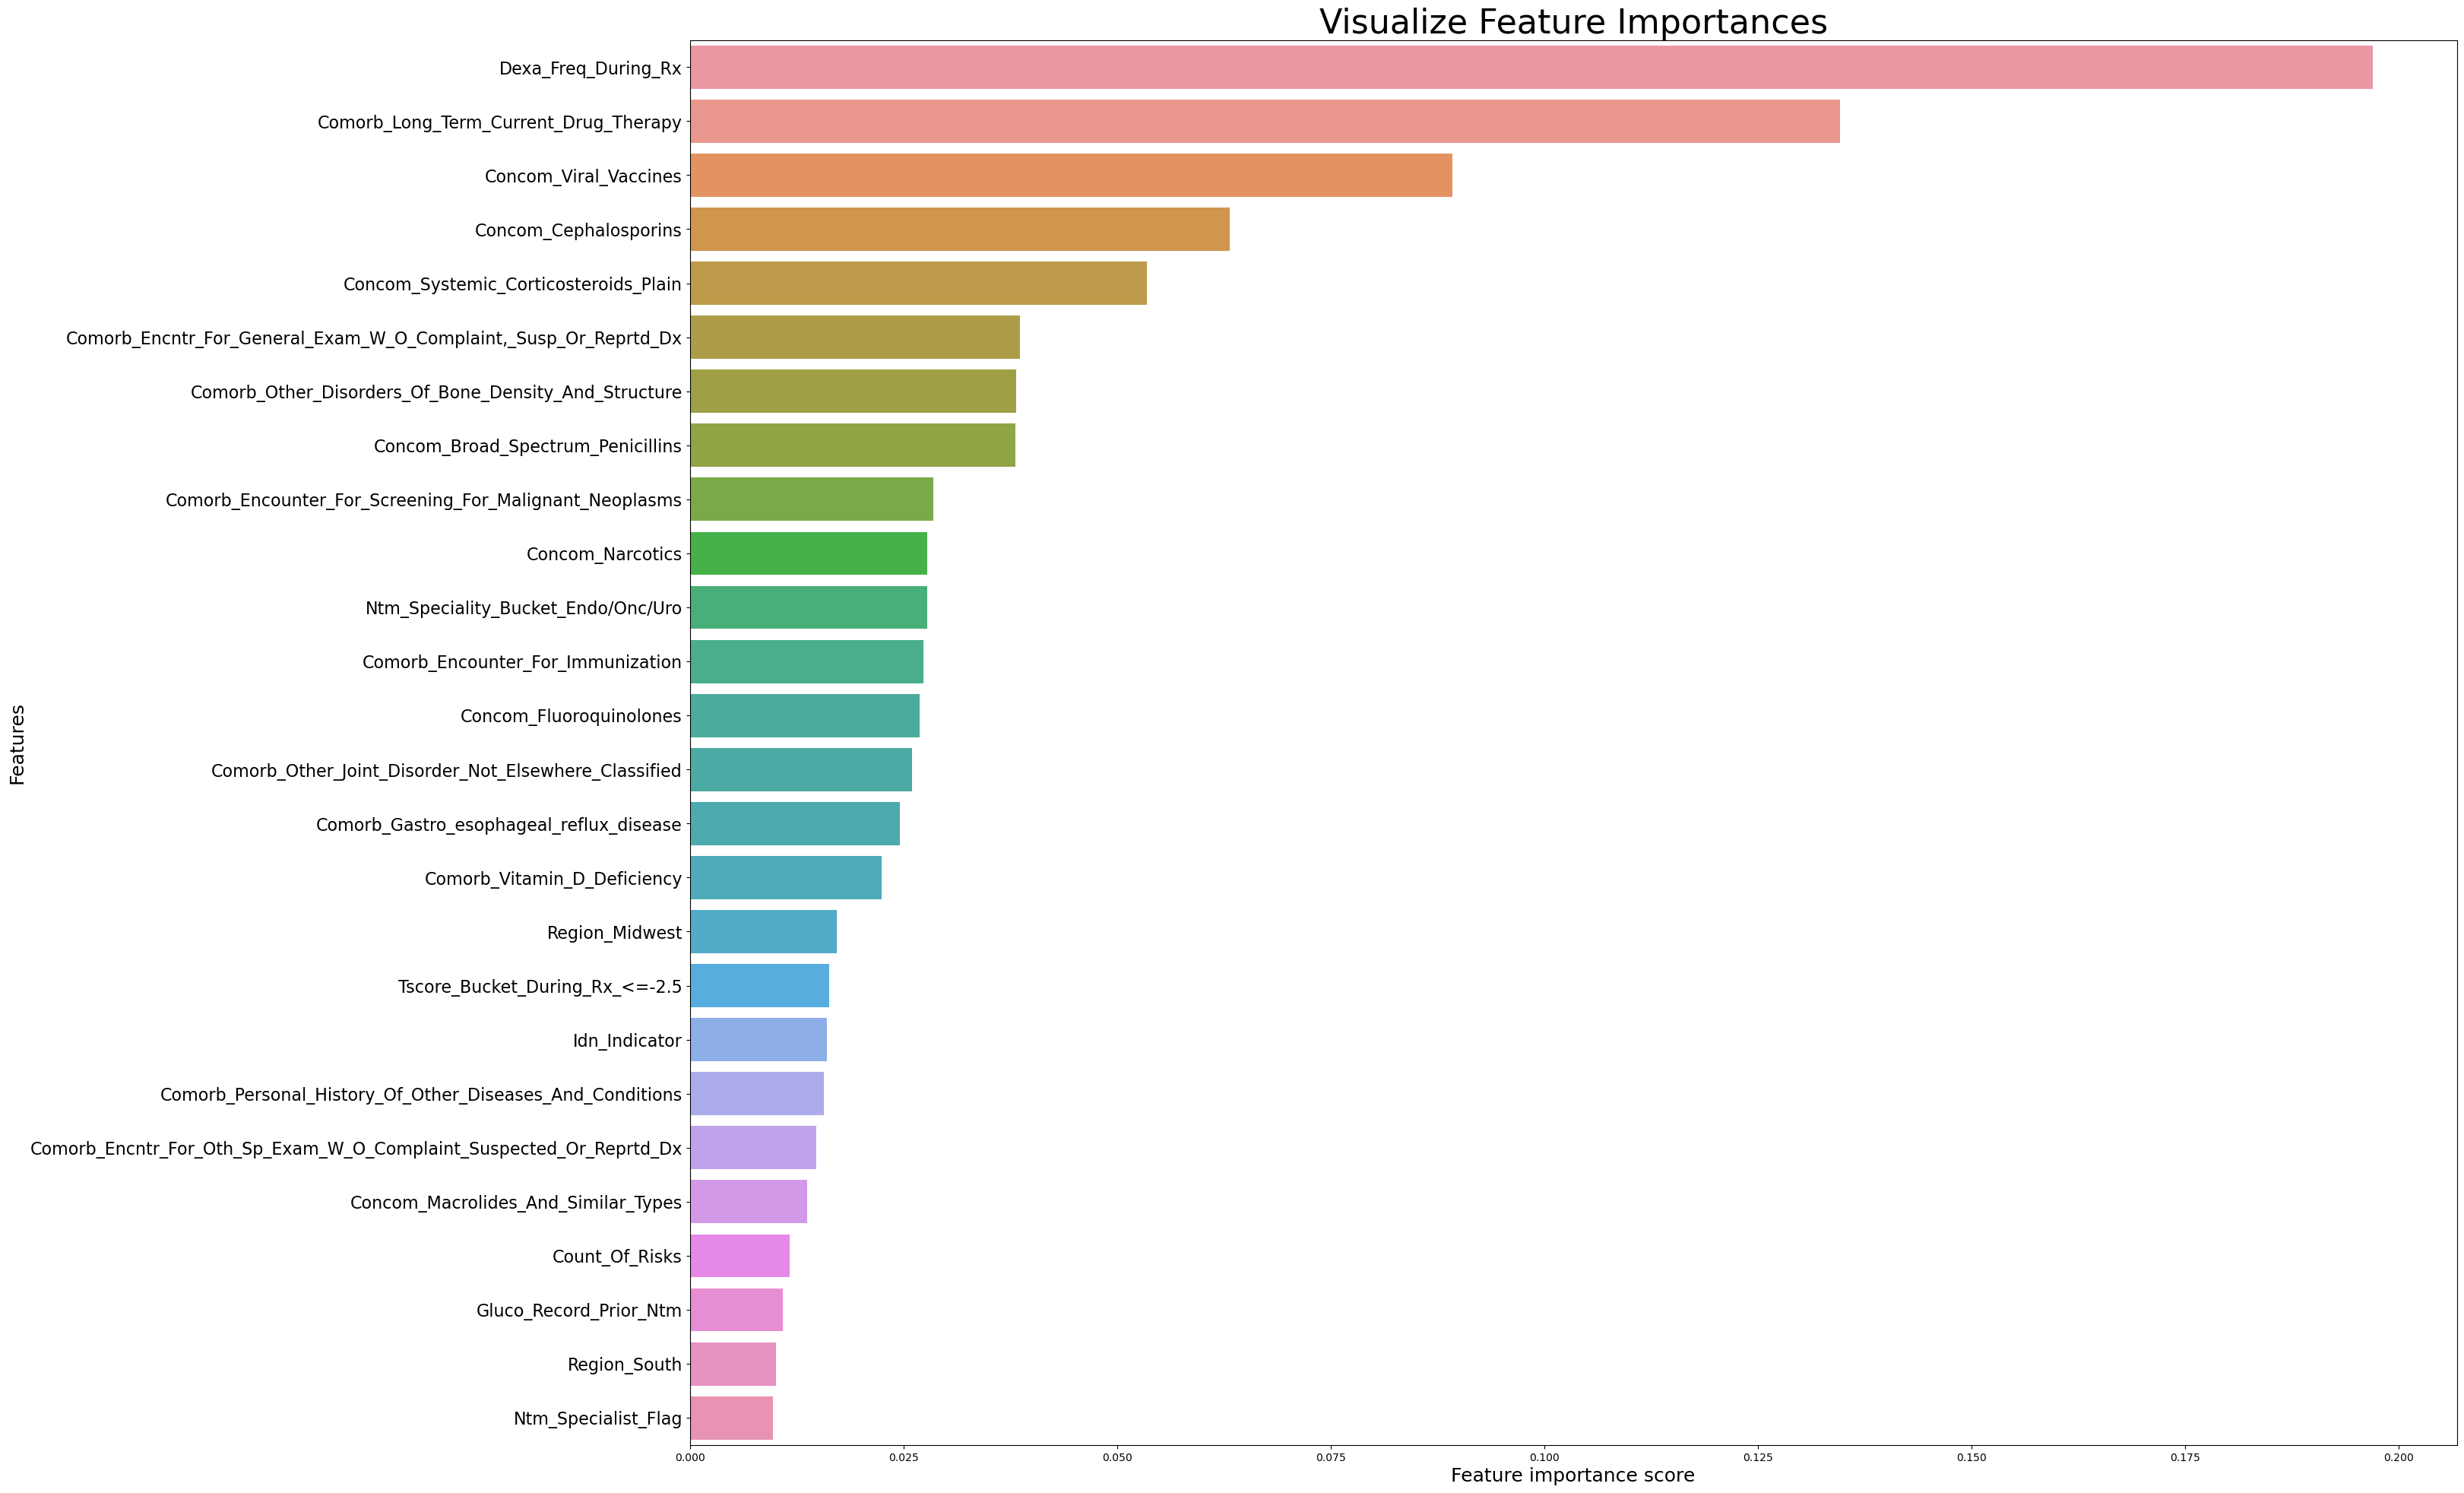

In [181]:
#plot the bar graph to viuslaize top features based on feature importance scores
fig, ax = plt.subplots(figsize=(30, 24))
f_ser['coeff'].round(decimals = 2)
ax = sns.barplot(x='coeff', y=f_ser.index, data=f_ser)
ax.set_title("Visualize Feature Importances",fontsize=32)
ax.set_yticklabels(f_ser.index,fontsize=16)
ax.set_xlabel("Feature importance score",fontsize=18)
ax.set_ylabel("Features",fontsize=18)
plt.show()

### Model Optimization

In [182]:
f_new=f_ser.reset_index().rename(columns={'index': 'Features'})

In [183]:
f_new['Features'].unique()

array(['Dexa_Freq_During_Rx', 'Comorb_Long_Term_Current_Drug_Therapy',
       'Concom_Viral_Vaccines', 'Concom_Cephalosporins',
       'Concom_Systemic_Corticosteroids_Plain',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Concom_Broad_Spectrum_Penicillins',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Concom_Narcotics', 'Ntm_Speciality_Bucket_Endo/Onc/Uro',
       'Comorb_Encounter_For_Immunization', 'Concom_Fluoroquinolones',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Comorb_Vitamin_D_Deficiency', 'Region_Midwest',
       'Tscore_Bucket_During_Rx_<=-2.5', 'Idn_Indicator',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Concom_Macrolides_And_Similar_Types', 'Count_Of_Risks',
       

In [184]:
#Split the feature important dataset into train and test datasets 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
x=data[['Dexa_Freq_During_Rx', 'Comorb_Long_Term_Current_Drug_Therapy',
       'Concom_Viral_Vaccines', 'Concom_Cephalosporins',
       'Concom_Systemic_Corticosteroids_Plain',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Concom_Broad_Spectrum_Penicillins',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Concom_Narcotics', 'Ntm_Speciality_Bucket_Endo/Onc/Uro',
       'Comorb_Encounter_For_Immunization', 'Concom_Fluoroquinolones',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Comorb_Vitamin_D_Deficiency', 'Region_Midwest',
       'Tscore_Bucket_During_Rx_<=-2.5', 'Idn_Indicator',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Concom_Macrolides_And_Similar_Types', 'Count_Of_Risks',
       'Gluco_Record_Prior_Ntm', 'Region_South', 'Ntm_Specialist_Flag']]
y=data['Persistency_Flag']
X_train_org,X_test_org,Y_train1,Y_test1=train_test_split(x,y,train_size=0.7, random_state=0)
scaler=MinMaxScaler()
X_train1=pd.DataFrame(scaler.fit_transform(X_train_org),columns=X_train_org.columns)
X_test1=pd.DataFrame(scaler.transform(X_test_org),columns=X_test_org.columns)

### Improve the performance of XGBoost using Bayesian Optimization.

In [189]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [192]:
#perform model optimization using Bayesian Optimization and retreive best tuning parameters
from bayes_opt import BayesianOptimization
np.seterr(invalid='ignore')
def xgb_hyper_param(learning_rate,n_estimators,max_depth,subsample,colsample_bytree,gamma,min_child_weight):
    max_depth=int(max_depth)
    n_estimators=int(n_estimators)
    model = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth, 
                                   subsample=subsample, colsample_bytree=colsample_bytree,
                                  gamma=gamma,min_child_weight=min_child_weight)
    model.fit(X_train1.to_numpy(), Y_train1.to_numpy())
    y_score = model.predict_proba(X_test1)
    f = roc_auc_score(Y_test1, y_score[:,1])
    return f
# Set range of C to optimize for.
# bayes_opt requires this to be a dictionary.
pbounds = {'learning_rate':(0.01,1.0),
          'n_estimators':(100,1000),
          'max_depth':(3,10),
          'subsample':(0.0,1.0),
          'colsample_bytree':(0.0,1.0),
          'gamma':(0,5),
          'min_child_weight':(30,100)}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = xgb_hyper_param,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 10)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.8156    | 0.967     | 2.736     | 0.973     | 8.004     | 78.84     | 294.5     | 0.9763    |
| 2         | 0.8324    | 0.00623   | 1.265     | 0.4404    | 8.456     | 43.84     | 876.7     | 0.9834    |
| 3         | 0.8262    | 0.1638    | 2.987     | 0.0189    | 5.706     | 33.09     | 961.0     | 0.4361    |
| 4         | 0.7109    | 0.949     | 3.932     | 0.8676    | 4.212     | 35.25     | 640.7     | 0.168     |
| 5         | 0.5       | 0.7334    | 2.042     | 0.5326    | 9.563     | 66.52     | 197.4     | 0.1582    |
| 6         | 0.8217    | 0.8445    | 1.742     | 0.3582    | 3.615     | 37.4      | 871.1     | 0.7973    |
| 7         | 0.7991    | 0.2343    | 3.869     | 0.1322    | 5.117     | 31.55     | 961.7     | 0.3908    |
| 8       

In [196]:
#Model XGBoost Classifier again with the best parameters and check for the final scores
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(learning_rate=0.01,n_estimators=954,max_depth=10,subsample=0.89,
                        colsample_bytree=0.0,gamma=0.0,min_child_weight=49.718,random_state=0)
xgb_clf.fit(X_train1.to_numpy(), Y_train1.to_numpy())
Y_predict1=xgb_clf.predict(X_test1)
pred_prob_xgb_train = xgb_clf.predict_proba(X_train1)
pred_prob_xgb_test = xgb_clf.predict_proba(X_test1)
xgb_best_accuracy_score = accuracy_score(Y_test1, Y_predict1)
xgb_best_train_score = roc_auc_score(Y_train1, pred_prob_xgb_train[:,1])
xgb_best_test_score = roc_auc_score(Y_test1, pred_prob_xgb_test[:,1])
print("XGBoost Accuracy Score: {:.3f}".format(xgb_best_accuracy_score))
print("XGBoost Train ROC_AUC Score: {:.3f}".format(xgb_best_train_score))
print("XGBoost Tree Test ROC_AUC Score: {:.3f}".format(xgb_best_test_score))

XGBoost Accuracy Score: 0.778
XGBoost Train ROC_AUC Score: 0.855
XGBoost Tree Test ROC_AUC Score: 0.834


### Before hyper parameter tuning:

XGBoost Accuracy Score: 0.791

XGBoost Train ROC_AUC Score: 0.880

XGBoost Tree Test ROC_AUC Score: 0.833

XGBoost Classifier Train ROC_AUC 0.8797 

Test ROC_AUC: 0.8335
    
### After hyper parameter tuning:


XGBoost Accuracy Score: 0.778

XGBoost Train ROC_AUC Score: 0.855

XGBoost Tree Test ROC_AUC Score: 0.834

#### The scores for XGBoost Classifier are high before parameter tuning.
#### We can go with XGBoost Classifier without hyper parameter tuning for predicting Persistency of a patient.
